In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, f1_score
from pycaret.classification import *
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import KFold, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier



In [2]:
df = pd.read_csv("data_with_junk_food_solid - NVA.csv")
df_numeric = df.drop(
    columns=[
        "Food code",
        "Main food description",
        "WWEIA Category description",
        "WWEIA Category number",
        "Is Liquid",
    ]
)

# drop all rows with inf values
df_numeric = df_numeric.replace([np.inf, -np.inf], np.nan).dropna()

# removing all non-scaled nutrients to ensure no impact to the model through double counting
X = df_numeric.drop(
    columns=[
        "Junk Food",
        "NRF9.3",
        "Sodium (mg)",
        "Protein (g)",
        "Fiber, total dietary (g)",
        "Vitamin A, RAE (mcg_RAE)",
        "Vitamin C (mg)",
        "Vitamin E (alpha-tocopherol) (mg)",
        "Calcium (mg)",
        "Iron\n(mg)",
        "Magnesium (mg)",
        "Potassium (mg)",
        "Fatty acids, total saturated (g)",
        "Sugars, total\n(g)",
    ]
)
y = df_numeric["Junk Food"]

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Using Pycaret to determine the best model

In [4]:
# Explore different models using pycaret

clf_setup = setup(
    data=df_numeric,
    target="Junk Food",
    ignore_features=[
        "Food code",
        "Main food description",
        "WWEIA Category number",
        "WWEIA Category description",
        "NRF9.3 Score",  # these columns represent data leakage
        "NR9 Score",
        "LIM3 Score",
        "NRF9.3",
        # "Protein (g)_per_100kcal",
        # "Fiber, total dietary (g)_per_100kcal",
        # "Vitamin A, RAE (mcg_RAE)_per_100kcal",
        # "Vitamin C (mg)_per_100kcal",
        # "Vitamin E (alpha-tocopherol) (mg)_per_100kcal",
        # "Calcium (mg)_per_100kcal",
        # "Iron\n(mg)_per_100kcal",
        # "Magnesium (mg)_per_100kcal",
        # "Potassium (mg)_per_100kcal",
        # "Fatty acids, total saturated (g)_per_100kcal",
        # "Sugars, total\n(g)_per_100kcal",
        # "Sodium (mg)_per_100kcal",
        # "Protein (g)",
        # "Fiber",
        # "Vitamin A, RAE (mcg_RAE)",
        # "Vitamin C (mg)",
        # "Vitamin E (alpha-tocopherol) (mg)l",
        # "Calcium (mg)",
        # "Iron\n(mg)",
        # "Magnesium (mg)",
        # "Potassium (mg)",
        # "Fatty acids, total saturated (g)",
        # "Sugars, total\n(g)",
        # "Sodium (mg)",
    ],
    numeric_features=[
        "Energy (kcal)",
        # "Protein (g)",  # beneficial
        "Carbohydrate (g)",
        # "Sugars, total\n(g)",  # limiting
        # "Fiber, total dietary (g)",  # beneficial
        "Total Fat (g)",
        # "Fatty acids, total saturated (g)",  # limiting
        "Fatty acids, total monounsaturated (g)",
        "Fatty acids, total polyunsaturated (g)",
        "Cholesterol (mg)",
        "Retinol (mcg)",
        # "Vitamin A, RAE (mcg_RAE)",  # beneficial
        "Carotene, alpha (mcg)",
        "Carotene, beta (mcg)",
        "Cryptoxanthin, beta (mcg)",
        "Lycopene (mcg)",
        "Lutein + zeaxanthin (mcg)",
        "Thiamin (mg)",
        "Riboflavin (mg)",
        "Niacin (mg)",
        "Vitamin B-6 (mg)",
        "Folic acid (mcg)",
        "Folate, food (mcg)",
        "Folate, DFE (mcg_DFE)",
        "Folate, total (mcg)",
        "Choline, total (mg)",
        "Vitamin B-12 (mcg)",
        "Vitamin B-12, added\n(mcg)",
        # "Vitamin C (mg)",  # beneficial
        "Vitamin D (D2 + D3) (mcg)",
        # "Vitamin E (alpha-tocopherol) (mg)",  # beneficial
        "Vitamin E, added\n(mg)",
        "Vitamin K (phylloquinone) (mcg)",
        # "Calcium (mg)",  # beneficial
        "Phosphorus (mg)",
        # "Magnesium (mg)",  # beneficial
        # "Iron\n(mg)",  # beneficial
        "Zinc\n(mg)",
        "Copper (mg)",
        "Selenium (mcg)",
        # "Potassium (mg)",  # beneficial
        # "Sodium (mg)",  # limiting
        "Caffeine (mg)",
        "Theobromine (mg)",
        "Alcohol (g)",
        "Water\n(g)",
        # "Is Liquid",
        "Protein (g)_per_100kcal",
        "Fiber, total dietary (g)_per_100kcal",
        "Vitamin A, RAE (mcg_RAE)_per_100kcal",
        "Vitamin C (mg)_per_100kcal",
        "Vitamin E (alpha-tocopherol) (mg)_per_100kcal",
        "Calcium (mg)_per_100kcal",
        "Iron\n(mg)_per_100kcal",
        "Magnesium (mg)_per_100kcal",
        "Potassium (mg)_per_100kcal",
        "Fatty acids, total saturated (g)_per_100kcal",
        "Sugars, total\n(g)_per_100kcal",
        "Sodium (mg)_per_100kcal",
    ],
    fold=5,
    preprocess=False,
    session_id=42,
)  # 'NRF9.3 Score'],)

# Compare models to find the best one
best_model = compare_models(fold=5)

# Print the best model
print(best_model)

,Description,Value
0,Session id,42
1,Target,Junk Food
2,Target type,Binary
3,Original data shape,"(4470, 79)"
4,Transformed data shape,"(4470, 78)"
5,Transformed train set shape,"(3129, 78)"
6,Transformed test set shape,"(1341, 78)"
7,Ignore features,8
8,Numeric features,46


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.9936,0.9999,0.9943,0.9931,0.9937,0.9872,0.9872,0.5140
svm,SVM - Linear Kernel,0.9652,0.9857,0.9728,0.9591,0.9656,0.9303,0.9311,0.0100
gbc,Gradient Boosting Classifier,0.9626,0.9945,0.9709,0.9559,0.9633,0.9252,0.9254,0.5660
xgboost,Extreme Gradient Boosting,0.9623,0.9961,0.9646,0.9610,0.9627,0.9246,0.9247,0.0800
ada,Ada Boost Classifier,0.9476,0.9878,0.9614,0.9369,0.9489,0.8951,0.8957,0.1200
rf,Random Forest Classifier,0.9450,0.9883,0.9412,0.9496,0.9453,0.8901,0.8902,0.1240
et,Extra Trees Classifier,0.9265,0.9810,0.9285,0.9265,0.9274,0.8530,0.8533,0.0560
dt,Decision Tree Classifier,0.9198,0.9197,0.9304,0.9131,0.9215,0.8395,0.8401,0.0260
knn,K Neighbors Classifier,0.9121,0.9726,0.9469,0.8870,0.9159,0.8241,0.8261,0.1580
ridge,Ridge Classifier,0.8632,0.9362,0.9108,0.8348,0.8709,0.7261,0.7297,0.0120


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


In [5]:
cv_results = pull()
cv_results

# # Optionally, finalize the best model for deployment
# final_best_model = finalize_model(best_model)
# print(final_best_model)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.9936,0.9999,0.9943,0.9931,0.9937,0.9872,0.9872,0.514
svm,SVM - Linear Kernel,0.9652,0.9857,0.9728,0.9591,0.9656,0.9303,0.9311,0.010
gbc,Gradient Boosting Classifier,0.9626,0.9945,0.9709,0.9559,0.9633,0.9252,0.9254,0.566
xgboost,Extreme Gradient Boosting,0.9623,0.9961,0.9646,0.9610,0.9627,0.9246,0.9247,0.080
ada,Ada Boost Classifier,0.9476,0.9878,0.9614,0.9369,0.9489,0.8951,0.8957,0.120
rf,Random Forest Classifier,0.9450,0.9883,0.9412,0.9496,0.9453,0.8901,0.8902,0.124
et,Extra Trees Classifier,0.9265,0.9810,0.9285,0.9265,0.9274,0.8530,0.8533,0.056
dt,Decision Tree Classifier,0.9198,0.9197,0.9304,0.9131,0.9215,0.8395,0.8401,0.026
knn,K Neighbors Classifier,0.9121,0.9726,0.9469,0.8870,0.9159,0.8241,0.8261,0.158
ridge,Ridge Classifier,0.8632,0.9362,0.9108,0.8348,0.8709,0.7261,0.7297,0.012


Evaluating the models using sklearn

In [6]:
k_5_fold = KFold(n_splits=5, shuffle=True, random_state=42)

models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Support Vector Machine": SVC(kernel='linear', probability=True, random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
    "XGB": XGBClassifier(n_estimators=100, random_state=42)
}

results = []

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=k_5_fold, scoring='accuracy')
#     results.append({"Model": name, "Accuracy": accuracy, "F1 Score": f1})
    results.append({"Model": name, "Accuracy": accuracy, "F1 Score": f1, "Mean Accuracy":cv_scores.mean()
                    , "Std":cv_scores.std()})

results_df = pd.DataFrame(results).sort_values(by="Accuracy", ascending=False)
print(results_df)

                    Model  Accuracy  F1 Score  Mean Accuracy       Std
3  Support Vector Machine  0.972036  0.972019       0.950786  0.005934
5                     XGB  0.960850  0.960851       0.964208  0.005182
1       Gradient Boosting  0.956376  0.956350       0.962251  0.007279
2     Logistic Regression  0.949664  0.949620       0.939321  0.007404
0           Random Forest  0.928412  0.928424       0.928694  0.011207
4     K-Nearest Neighbors  0.841163  0.841077       0.831935  0.002836


Running for Logistic Regression - Originally the "best" model via pycaret

In [18]:
model_results = pd.DataFrame(columns=["Mean Accuracy", "Standard Deviation"])

In [19]:
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train_scaled, y_train)

y_pred = lr_model.predict(X_test_scaled)

# 5-fold cross-validation
cv_scores = cross_val_score(lr_model, X_train_scaled, y_train, cv=5, scoring='accuracy')

print(f"Cross-validation accuracy scores: {cv_scores}")
print(f"Mean accuracy: {np.mean(cv_scores):.4f}")
print(f"Standard deviation: {np.std(cv_scores):.4f}")

#Crete a dataframe to track the Mean and Standard Deviation of the accuracy scores.  The index will be the model name
model_results.loc["Logistic Regression"] = [np.mean(cv_scores), np.std(cv_scores)]   

model_results

Cross-validation accuracy scores: [0.91759777 0.95384615 0.94825175 0.92587413 0.94405594]
Mean accuracy: 0.9379
Standard deviation: 0.0138


,Mean Accuracy,Standard Deviation
Logistic Regression,0.937925,0.013828


In [25]:
# accuracy = accuracy_score(y_test, y_pred)
# report = classification_report(y_test, y_pred)
# print(f"Accuracy: {accuracy:.4f}")
# print(report)

In [26]:
# # Feature importance
# feature_importance = lr_model.coef_[0]
# feature_names = X.columns
# feat_imp_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance}).sort_values(by='Importance', ascending=False)

# plt.figure(figsize=(12, 6))
# plt.barh(feat_imp_df['Feature'][:15], feat_imp_df['Importance'][:15])
# plt.xlabel("Feature Importance")
# plt.ylabel("Features")
# plt.title("Top 15 Important Features for Solid Food Type")
# plt.gca().invert_yaxis()
# plt.show()

In [27]:
# # Ablation Study
# ablation_results = []
# sorted_features = feat_imp_df['Feature'].tolist()[::-1]
# X_train_ablate = X_train_scaled.copy()
# X_test_ablate = X_test_scaled.copy()

# for i in range(0, len(sorted_features), 5):
#     if i > 0:
#         features_to_remove = sorted_features[:i]
#         feature_indices = [X.columns.get_loc(f) for f in features_to_remove]
#         X_train_ablate = np.delete(X_train_scaled, feature_indices, axis=1)
#         X_test_ablate = np.delete(X_test_scaled, feature_indices, axis=1)

#     lr_model_ablate = LogisticRegression(random_state=42)
#     lr_model_ablate.fit(X_train_ablate, y_train)

#     y_pred_ablate = lr_model_ablate.predict(X_test_ablate)
#     accuracy_ablate = accuracy_score(y_test, y_pred_ablate)
#     f1_ablate = f1_score(y_test, y_pred_ablate, average='weighted')
#     ablation_results.append({"Removed Features": sorted_features[i], "Accuracy": accuracy_ablate, "F1 Score": f1_ablate})

# ablation_df = pd.DataFrame(ablation_results)
# print(ablation_df)

In [28]:
# # Sensitivity Analysis
# param_grid = {
#     'C': [0.01, 0.1, 1, 10],  # Regularization strength
#     'penalty': ['l1', 'l2']   # L1 (Lasso) and L2 (Ridge) regularization
# }

# grid_search = GridSearchCV(lr_model, param_grid, cv=3, scoring='accuracy', n_jobs=-1)
# grid_search.fit(X_train_scaled, y_train)

In [29]:
# best_params = grid_search.best_params_
# best_model = grid_search.best_estimator_
# y_pred_best = best_model.predict(X_test_scaled)
# best_accuracy = accuracy_score(y_test, y_pred_best)

# print("Best Hyperparameters:", best_params)
# print(f"Best Model Accuracy: {best_accuracy:.4f}")

# print("Classification Report:\n", classification_report(y_test, y_pred_best))

In [30]:
# # Failure analysis
# df_test = X_test.copy()
# df_test['Actual'] = y_test.values
# df_test['Predicted'] = y_pred

# misclassified = df_test[df_test['Actual'] != df_test['Predicted']]

# misclassification_counts = misclassified.groupby(['Actual', 'Predicted']).size().reset_index(name='Count')

# print("Misclassified Samples:")
# print(misclassified)

# print("\nMisclassification Counts:")
# print(misclassification_counts)

SVM Model Analysis

In [20]:
#Test against an SVM model
svm_model = SVC(kernel='linear', probability=True, random_state=42)
svm_model.fit(X_train_scaled, y_train)

y_pred = svm_model.predict(X_test_scaled)

# 5-fold cross-validation
cv_scores = cross_val_score(svm_model, X_train_scaled, y_train, cv=5, scoring='accuracy')

print(f"Cross-validation accuracy scores: {cv_scores}")
print(f"Mean accuracy: {np.mean(cv_scores):.4f}")
print(f"Standard deviation: {np.std(cv_scores):.4f}")

#Create a dataframe to track the Mean and Standard Deviation of the accuracy scores.  The index will be the model name
model_results.loc["SVM"] = [np.mean(cv_scores), np.std(cv_scores)]   

model_results

Cross-validation accuracy scores: [0.93994413 0.96783217 0.94825175 0.94965035 0.95524476]
Mean accuracy: 0.9522
Standard deviation: 0.0092


,Mean Accuracy,Standard Deviation
Logistic Regression,0.937925,0.013828
SVM,0.952185,0.009230


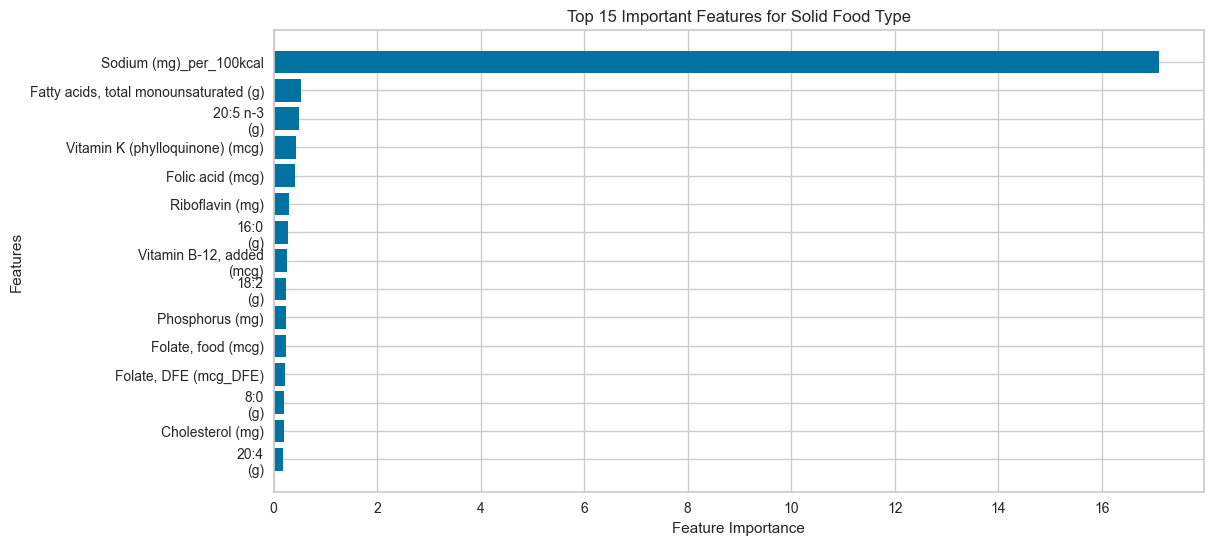

In [21]:
# Feature importance
feature_importance = svm_model.coef_[0]
feature_names = X.columns
feat_imp_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 6))
plt.barh(feat_imp_df['Feature'][:15], feat_imp_df['Importance'][:15])
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Top 15 Important Features for Solid Food Type")
plt.gca().invert_yaxis()
plt.show()

In [22]:
# Ablation Study
ablation_results = []
sorted_features = feat_imp_df['Feature'].tolist()[::-1]
X_train_ablate = X_train_scaled.copy()
X_test_ablate = X_test_scaled.copy()

for i in range(0, len(sorted_features), 5):
    if i > 0:
        features_to_remove = sorted_features[:i]
        feature_indices = [X.columns.get_loc(f) for f in features_to_remove]
        X_train_ablate = np.delete(X_train_scaled, feature_indices, axis=1)
        X_test_ablate = np.delete(X_test_scaled, feature_indices, axis=1)

    lr_model_ablate = LogisticRegression(random_state=42)
    lr_model_ablate.fit(X_train_ablate, y_train)

    y_pred_ablate = lr_model_ablate.predict(X_test_ablate)
    accuracy_ablate = accuracy_score(y_test, y_pred_ablate)
    f1_ablate = f1_score(y_test, y_pred_ablate, average='weighted')
    ablation_results.append({"Removed Features": sorted_features[i], "Accuracy": accuracy_ablate, "F1 Score": f1_ablate})

ablation_df = pd.DataFrame(ablation_results)
print(ablation_df)

              Removed Features  Accuracy  F1 Score
0   Potassium (mg)_per_100kcal  0.949664  0.949620
1   Magnesium (mg)_per_100kcal  0.883669  0.883669
2       Vitamin E, added\n(mg)  0.884787  0.884756
3                    22:1\n(g)  0.872483  0.872442
4             Vitamin B-6 (mg)  0.869128  0.869104
5                Caffeine (mg)  0.845638  0.845514
6    Lutein + zeaxanthin (mcg)  0.817673  0.817457
7                    12:0\n(g)  0.815436  0.815347
8                    20:1\n(g)  0.777405  0.777398
9               Selenium (mcg)  0.781879  0.781857
10                   20:4\n(g)  0.788591  0.788406
11             Phosphorus (mg)  0.777405  0.777445
12            Folic acid (mcg)  0.729306  0.729289


In [23]:
# Sensitivity Analysis
param_grid = {
    'C': [0.1, 1, 10],  
    'kernel': ['linear', 'rbf'],  
    'gamma': ['scale', 0.01, 0.1]  
}

grid_search = GridSearchCV(svm_model, param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='linear', max_iter=-1,
                           probability=True, random_state=42, shrinking=True,
                           tol=0.001, verbose=False),
             n_jobs=-1,
             param_grid={'C': [0.1, 1, 10], 'gamma': ['scale', 0.01, 0.1],
                         'kernel': ['linear', 'rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [24]:
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test_scaled)
best_accuracy = accuracy_score(y_test, y_pred_best)

print("Best Hyperparameters:", best_params)
print(f"Best Model Accuracy: {best_accuracy:.4f}")

print("Classification Report:\n", classification_report(y_test, y_pred_best))

Best Hyperparameters: {'C': 10, 'gamma': 'scale', 'kernel': 'linear'}
Best Model Accuracy: 0.9855
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.99       435
           1       0.98      0.99      0.99       459

    accuracy                           0.99       894
   macro avg       0.99      0.99      0.99       894
weighted avg       0.99      0.99      0.99       894



In [25]:
# Failure analysis
df_test = X_test.copy()
df_test['Actual'] = y_test.values
df_test['Predicted'] = y_pred

misclassified = df_test[df_test['Actual'] != df_test['Predicted']]

misclassification_counts = misclassified.groupby(['Actual', 'Predicted']).size().reset_index(name='Count')

print("Misclassified Samples:")
print(misclassified)

print("\nMisclassification Counts:")
print(misclassification_counts)

Misclassified Samples:
      Energy (kcal)  Carbohydrate (g)  Total Fat (g)  \
2144            421             67.70          16.90   
3470            159             40.40           0.15   
1702            385             53.15           7.35   
2078            306             42.64          13.14   
2918            226             24.39          10.64   
17              106             19.38           1.89   
1052            115              4.50           7.34   
1941            409             39.23          24.94   
1178            179              4.41           8.69   
3687            178             17.32          11.45   
4348            133             30.63           0.24   
1189            299             23.96          14.78   
2436            411             79.07           5.63   
239             203              0.00          10.80   
621             174              7.79           6.22   
2429            472             67.78          20.68   
1055             75      

XGradient Boost

In [26]:
#Test against an xgb model
xgb_model = GradientBoostingClassifier(n_estimators = 100, random_state=42)
xgb_model.fit(X_train_scaled, y_train)

y_pred = xgb_model.predict(X_test_scaled)

# 5-fold cross-validation
cv_scores = cross_val_score(xgb_model, X_train_scaled, y_train, cv=5, scoring='accuracy')

print(f"Cross-validation accuracy scores: {cv_scores}")
print(f"Mean accuracy: {np.mean(cv_scores):.4f}")
print(f"Standard deviation: {np.std(cv_scores):.4f}")

#Create a dataframe to track the Mean and Standard Deviation of the accuracy scores.  The index will be the model name
model_results.loc["XGB"] = [np.mean(cv_scores), np.std(cv_scores)]   

model_results

Cross-validation accuracy scores: [0.95530726 0.96503497 0.95244755 0.93286713 0.95944056]
Mean accuracy: 0.9530
Standard deviation: 0.0109


,Mean Accuracy,Standard Deviation
Logistic Regression,0.937925,0.013828
SVM,0.952185,0.009230
XGB,0.953019,0.010930
